# Podcast Listening Data Exploration

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 01/04/2025   | Martin | Create  | Created notebook to explore the data | 
| 02/04/2025   | Martin | Update  | Completed data visualisation | 
| 21/04/2025   | Martin | Update  | Updated with new data transformation sequence with combinations and feature cross | 

# Content

* [Introduction](#introduction)
* [Data](#data)
* [Visualisation](#visualisation)
* [Data Processing R2](#data-processing-r2)

# Introduction

Visual and statistical exploration of the dataset. There are 2 datasets:

1. __Data from the competition__ - Data that was generated from a deep learning model trained on the original dataset
2. __Original dataset__ - Original Podcast listening dataset

# Data

[Data source](https://www.kaggle.com/competitions/playground-series-s5e4/data)

<u>Dataset Details</u>

* Size of data: (750,000, 12)
* Unique Podcasts: 48
* Unique Genres: 10
* Number of days: 7
* Number of times: 4

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pl.read_csv('data/train.csv')

In [3]:
df.shape

(750000, 12)

In [4]:
df.glimpse()

Rows: 750000
Columns: 12
$ id                          <i64> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ Podcast_Name                <str> 'Mystery Matters', 'Joke Junction', 'Study Sessions', 'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds', 'News Roundup', 'Daily Digest', 'Music Matters'
$ Episode_Title               <str> 'Episode 98', 'Episode 26', 'Episode 16', 'Episode 45', 'Episode 86', 'Episode 19', 'Episode 47', 'Episode 44', 'Episode 32', 'Episode 81'
$ Episode_Length_minutes      <f64> None, 119.8, 73.9, 67.17, 110.51, 26.54, 69.83, 48.52, 105.87, None
$ Genre                       <str> 'True Crime', 'Comedy', 'Education', 'Technology', 'Health', 'Health', 'True Crime', 'News', 'News', 'Music'
$ Host_Popularity_percentage  <f64> 74.81, 66.95, 69.97, 57.22, 80.07, 48.96, 35.82, 44.99, 69.81, 82.18
$ Publication_Day             <str> 'Thursday', 'Saturday', 'Tuesday', 'Monday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Monday', 'Thursday'
$ Publication_Time           

In [5]:
df.describe()

statistic,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
str,f64,str,str,f64,str,f64,str,str,f64,f64,str,f64
"""count""",750000.0,"""750000""","""750000""",662907.0,"""750000""",750000.0,"""750000""","""750000""",603970.0,749999.0,"""750000""",750000.0
"""null_count""",0.0,"""0""","""0""",87093.0,"""0""",0.0,"""0""","""0""",146030.0,1.0,"""0""",0.0
"""mean""",374999.5,null,null,64.504738,null,59.859901,null,null,52.236449,1.348855,null,45.437406
"""std""",216506.495284,null,null,32.969603,null,22.873098,null,null,28.451241,1.15113,null,27.138306
"""min""",0.0,"""Athlete's Arena""","""Episode 1""",0.0,"""Business""",1.3,"""Friday""","""Afternoon""",0.0,0.0,"""Negative""",0.0
"""25%""",187500.0,null,null,35.73,null,39.41,null,null,28.38,0.0,null,23.17835
"""50%""",375000.0,null,null,63.84,null,60.05,null,null,53.58,1.0,null,43.37946
"""75%""",562499.0,null,null,94.07,null,79.53,null,null,76.6,2.0,null,64.81158
"""max""",749999.0,"""World Watch""","""Episode 99""",325.24,"""True Crime""",119.46,"""Wednesday""","""Night""",119.91,103.91,"""Positive""",119.97


In [6]:
df.head()

id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
i64,str,str,f64,str,f64,str,str,f64,f64,str,f64
0,"""Mystery Matters""","""Episode 98""",null,"""True Crime""",74.81,"""Thursday""","""Night""",null,0.0,"""Positive""",31.41998
1,"""Joke Junction""","""Episode 26""",119.8,"""Comedy""",66.95,"""Saturday""","""Afternoon""",75.95,2.0,"""Negative""",88.01241
2,"""Study Sessions""","""Episode 16""",73.9,"""Education""",69.97,"""Tuesday""","""Evening""",8.97,0.0,"""Negative""",44.92531
3,"""Digital Digest""","""Episode 45""",67.17,"""Technology""",57.22,"""Monday""","""Morning""",78.7,2.0,"""Positive""",46.27824
4,"""Mind & Body""","""Episode 86""",110.51,"""Health""",80.07,"""Monday""","""Afternoon""",58.68,3.0,"""Neutral""",75.61031


Perform data cleaning to make the data more tabular. The main issues with this data is it's mostly in the string format. Need to numerically encode the data

Column details to note:

1. `number_of_ads`: There are some podcasts that have 53 and 103 ads and their runtime is only 10 mins more than the number of ads. Convert this to the mean number of ads

In [7]:
# Change all column names to lowercase
df = df.rename(lambda colname: colname.lower())

# Convert episode sentiment
# -1: Negative, 0: Neutral, 1: Positive
sentiment_map = {
  'Positive': 1,
  'Neutral': 0,
  'Negative': -1
}
# Convert days and times
day_mapper = {
  'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7
}
time_mapper = {
  'Morning': 1,
  'Afternoon': 2,
  'Evening': 3,
  'Night': 4
}

# Replace >12 ads with median value
# Replace with median because we want to exclude these outlier values
median_ads = df.select(pl.median('number_of_ads')).item()

df = df.with_columns(
  pl.col('episode_sentiment').replace(sentiment_map).cast(pl.Int64),
  pl.when(pl.col('number_of_ads') > 12)
    .then(median_ads)
    .otherwise('number_of_ads')
    .alias('number_of_ads'),

  # Fill null values on host andguest_popularity_percentage and episode_length_minutes
  # with respective podcast names mean value
  pl.col([
    'episode_length_minutes',
    'guest_popularity_percentage',
    'host_popularity_percentage'
  ]).fill_null(
    pl.col([
      'episode_length_minutes',
      'guest_popularity_percentage',
      'host_popularity_percentage'
    ]).mean().over('podcast_name')
  ),

  # Replace publication day and time with cyclical values
  pl.col('publication_day')
    .replace(day_mapper)
    .cast(pl.Int64)
    .map_batches(np.sin)
    .name.suffix('_sin'),
  pl.col('publication_day')
    .replace(day_mapper)
    .cast(pl.Int64)
    .map_batches(np.cos)
    .name.suffix('_cos'),
  pl.col('publication_time')
    .replace(time_mapper)
    .cast(pl.Int64)
    .map_batches(np.sin)
    .name.suffix('_sin'),
  pl.col('publication_time')
    .replace(time_mapper)
    .cast(pl.Int64)
    .map_batches(np.cos)
    .name.suffix('_cos'),
  
  # Remove Episode from episode_title and convert to integer
  pl.col('episode_title').str.replace(r"Episode ", "").cast(pl.Int64)
)

df.head()

id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,publication_day_sin,publication_day_cos,publication_time_sin,publication_time_cos
i64,str,i64,f64,str,f64,str,str,f64,f64,i64,f64,f64,f64,f64,f64
0,"""Mystery Matters""",98,64.388461,"""True Crime""",74.81,"""Thursday""","""Night""",52.241037,0.0,1,31.41998,-0.756802,-0.653644,-0.756802,-0.653644
1,"""Joke Junction""",26,119.8,"""Comedy""",66.95,"""Saturday""","""Afternoon""",75.95,2.0,-1,88.01241,-0.279415,0.96017,0.909297,-0.416147
2,"""Study Sessions""",16,73.9,"""Education""",69.97,"""Tuesday""","""Evening""",8.97,0.0,-1,44.92531,0.909297,-0.416147,0.14112,-0.989992
3,"""Digital Digest""",45,67.17,"""Technology""",57.22,"""Monday""","""Morning""",78.7,2.0,1,46.27824,0.841471,0.540302,0.841471,0.540302
4,"""Mind & Body""",86,110.51,"""Health""",80.07,"""Monday""","""Afternoon""",58.68,3.0,0,75.61031,0.841471,0.540302,0.909297,-0.416147


Create some additional columns that might be useful as indicator variables:

1. Listening time within 10% of episode time
2. Listening time within 20% of episode time

In [8]:
df.head()

id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,publication_day_sin,publication_day_cos,publication_time_sin,publication_time_cos
i64,str,i64,f64,str,f64,str,str,f64,f64,i64,f64,f64,f64,f64,f64
0,"""Mystery Matters""",98,64.388461,"""True Crime""",74.81,"""Thursday""","""Night""",52.241037,0.0,1,31.41998,-0.756802,-0.653644,-0.756802,-0.653644
1,"""Joke Junction""",26,119.8,"""Comedy""",66.95,"""Saturday""","""Afternoon""",75.95,2.0,-1,88.01241,-0.279415,0.96017,0.909297,-0.416147
2,"""Study Sessions""",16,73.9,"""Education""",69.97,"""Tuesday""","""Evening""",8.97,0.0,-1,44.92531,0.909297,-0.416147,0.14112,-0.989992
3,"""Digital Digest""",45,67.17,"""Technology""",57.22,"""Monday""","""Morning""",78.7,2.0,1,46.27824,0.841471,0.540302,0.841471,0.540302
4,"""Mind & Body""",86,110.51,"""Health""",80.07,"""Monday""","""Afternoon""",58.68,3.0,0,75.61031,0.841471,0.540302,0.909297,-0.416147


In [9]:
df = df.with_columns(
  listening_time_within_10=(pl.col('listening_time_minutes') > pl.col('episode_length_minutes')*0.9).cast(pl.Int64),
  listening_time_within_40=(pl.col('listening_time_minutes') > pl.col('episode_length_minutes')*0.6).cast(pl.Int64),
)

Now we create a few versions of the data to test using different algorithms:

1. Retain original columns
2. Label encoded `podcast_name` and `genre`
3. One-hot encoded `podcast_name` and `genre` 

In [10]:
# Label encoded dataframe
enc = LabelEncoder()
df_label = df.with_columns(
  pl.col('podcast_name').map_batches(enc.fit_transform),
  pl.col('genre').map_batches(enc.fit_transform),
)
df_label.head()

id,podcast_name,episode_title,episode_length_minutes,genre,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,publication_day_sin,publication_day_cos,publication_time_sin,publication_time_cos,listening_time_within_10,listening_time_within_40
i64,i64,i64,f64,i64,f64,str,str,f64,f64,i64,f64,f64,f64,f64,f64,i64,i64
0,34,98,64.388461,9,74.81,"""Thursday""","""Night""",52.241037,0.0,1,31.41998,-0.756802,-0.653644,-0.756802,-0.653644,0,0
1,24,26,119.8,1,66.95,"""Saturday""","""Afternoon""",75.95,2.0,-1,88.01241,-0.279415,0.96017,0.909297,-0.416147,0,1
2,40,16,73.9,2,69.97,"""Tuesday""","""Evening""",8.97,0.0,-1,44.92531,0.909297,-0.416147,0.14112,-0.989992,0,1
3,10,45,67.17,8,57.22,"""Monday""","""Morning""",78.7,2.0,1,46.27824,0.841471,0.540302,0.841471,0.540302,0,1
4,31,86,110.51,3,80.07,"""Monday""","""Afternoon""",58.68,3.0,0,75.61031,0.841471,0.540302,0.909297,-0.416147,0,1


In [ ]:
# One-hot encoded dataframe
df_oh = df_label.to_dummies(
  columns=['podcast_name', 'genre']
)
df_oh.head()

id,podcast_name_0,podcast_name_1,podcast_name_10,podcast_name_11,podcast_name_12,podcast_name_13,podcast_name_14,podcast_name_15,podcast_name_16,podcast_name_17,podcast_name_18,podcast_name_19,podcast_name_2,podcast_name_20,podcast_name_21,podcast_name_22,podcast_name_23,podcast_name_24,podcast_name_25,podcast_name_26,podcast_name_27,podcast_name_28,podcast_name_29,podcast_name_3,podcast_name_30,podcast_name_31,podcast_name_32,podcast_name_33,podcast_name_34,podcast_name_35,podcast_name_36,podcast_name_37,podcast_name_38,podcast_name_39,podcast_name_4,podcast_name_40,podcast_name_41,podcast_name_42,podcast_name_43,podcast_name_44,podcast_name_45,podcast_name_46,podcast_name_47,podcast_name_5,podcast_name_6,podcast_name_7,podcast_name_8,podcast_name_9,episode_title,episode_length_minutes,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,host_popularity_percentage,publication_day,publication_time,guest_popularity_percentage,number_of_ads,episode_sentiment,listening_time_minutes,publication_day_sin,publication_day_cos,publication_time_sin,publication_time_cos,listening_time_within_10,listening_time_within_40
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,str,str,f64,f64,i64,f64,f64,f64,f64,f64,i64,i64
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,64.388461,0,0,0,0,0,0,0,0,0,1,74.81,"""Thursday""","""Night""",52.241037,0.0,1,31.41998,-0.756802,-0.653644,-0.756802,-0.653644,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,119.8,0,1,0,0,0,0,0,0,0,0,66.95,"""Saturday""","""Afternoon""",75.95,2.0,-1,88.01241,-0.279415,0.96017,0.909297,-0.416147,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,16,73.9,0,0,1,0,0,0,0,0,0,0,69.97,"""Tuesday""","""Evening""",8.97,0.0,-1,44.92531,0.909297,-0.416147,0.14112,-0.989992,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,67.17,0,0,0,0,0,0,0,0,1,0,57.22,"""Monday""","""Morning""",78.7,2.0,1,46.27824,0.841471,0.540302,0.841471,0.540302,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,110.51,0,0,0,1,0,0,0,0,0,0,80.07,"""Monday""","""Afternoon""",58.68,3.0,0,75.61031,0.841471,0.540302,0.909297,-0.416147,0,1


# Visualisation

Create a few visualisations to observe any difference within each podcast or genre

1. Scatter plot for each podcast
2. Correlation plot

Scatter plot for each podcast. Want to see the evolution of listening across the number of episodes. Will there be a decrease or increase in listenership over time.

In [12]:
def scatter_podcast(df, podcasts_name, episode_title, hue):
  df = df.filter(
    pl.col('podcast_name') == podcasts_name,
    pl.col('episode_title') == episode_title
  )
  max_val = df['episode_length_minutes'].max()
  line = [0, max_val]

  fig, ax = plt.subplots()
  p1 = sns.scatterplot(
    x='episode_length_minutes',
    y='listening_time_minutes',
    data=df,
    hue=hue
  )
  p2 = sns.lineplot(
    x=line,
    y=line,
    color='r'
  )

  return fig

/tmp/ipykernel_57363/1204028310.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  scatter_podcast(df, "Brain Boost", 88, 'listening_time_within_40').show()


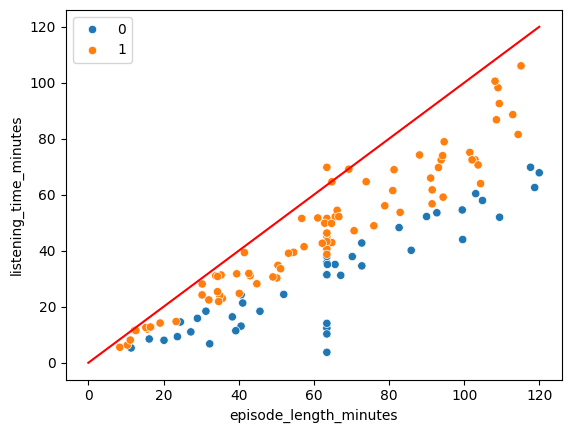

In [13]:
scatter_podcast(df, "Brain Boost", 88, 'listening_time_within_40').show()

Correlation plots to observe any relationship between the columns

Text(0.5, 1.0, 'Correlation Heatmap')

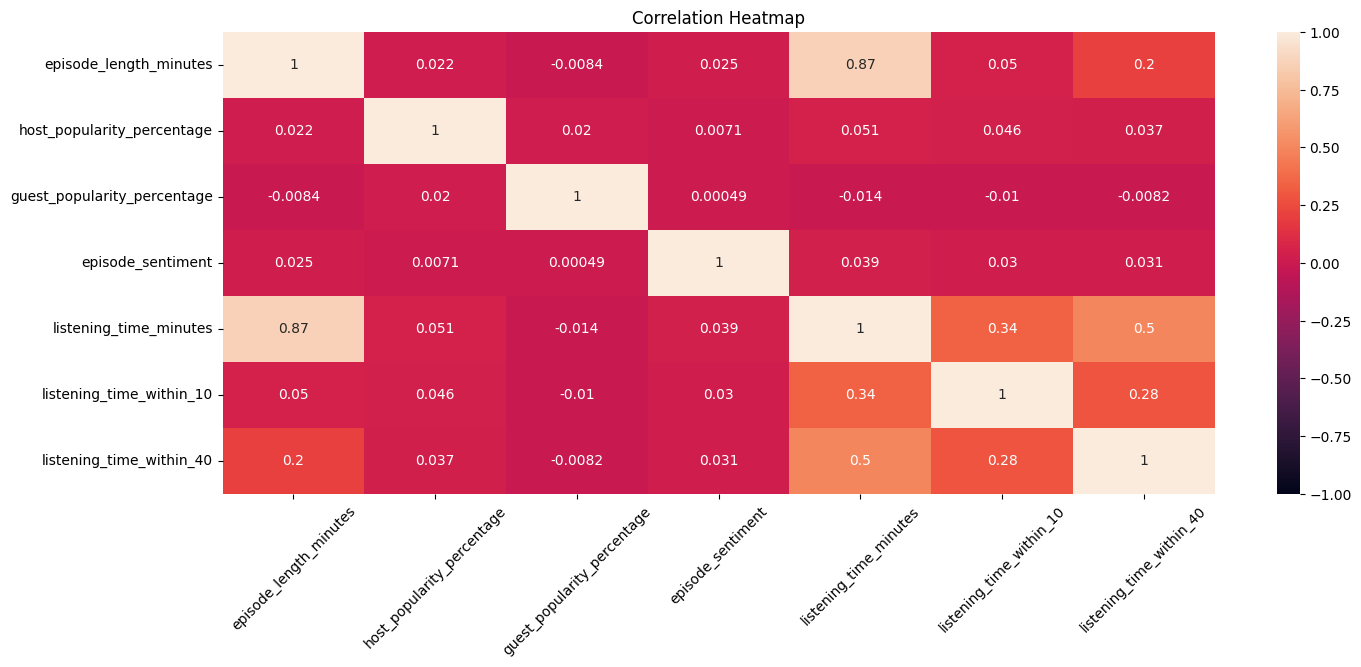

In [30]:
select_cols = [
  'episode_length_minutes',
  'host_popularity_percentage',
  'guest_popularity_percentage',
  'episode_sentiment',
  'listening_time_minutes',
  'listening_time_within_10',
  'listening_time_within_40'
]
temp = df.select(
  select_cols
)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
  temp.corr(),
  vmin=-1,
  vmax=1,
  annot=True,
)
heatmap.set_xticklabels(temp.columns, rotation=45)
heatmap.set_yticklabels(temp.columns, rotation=0)
heatmap.set_title("Correlation Heatmap")


Line plot of average metric over each podcast and episode

In [ ]:
def episode_mean_time_scatter(df, col_y, podcast):
  df = df.group_by(pl.col('podcast_name', 'episode_title')) \
         .agg(pl.col(col_y).mean())
  
  df = df.filter(
    pl.col('podcast_name') == podcast
  ).sort('episode_title')

  fig = sns.lineplot(
    data=df,
    x='episode_title',
    y=col_y,
    marker='o',
  )
  fig.set_title(f"Scatter Plot of {podcast}: {col_y} against episode_title")
  plt.grid()

  return 

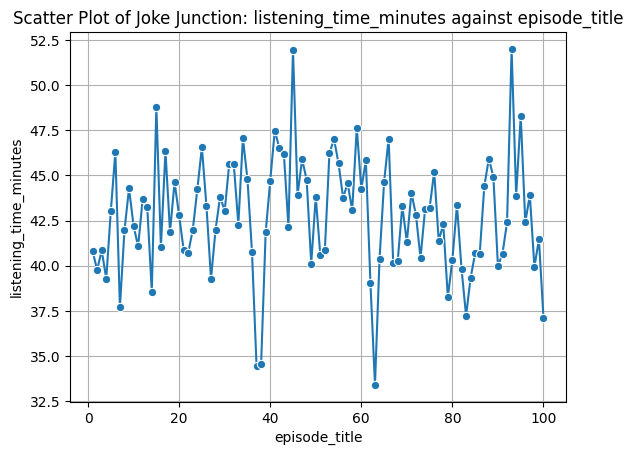

In [73]:
episode_mean_time_scatter(df, 'listening_time_minutes', "Joke Junction")

# Statistics

Provide some aggregated group statistics of the dataframe

In [147]:
# Which series had the highest number of listeners that listened to their podcast
popular = df.group_by(
  pl.col('podcast_name')
).agg(
  pl.col('listening_time_within_10').sum(),
  pl.col('listening_time_within_50').sum(),
)

popular.sort('listening_time_within_10', descending=True)

podcast_name,listening_time_within_10,listening_time_within_50
str,i64,i64
"""Tech Talks""",3650,19011
"""Funny Folks""",2907,16091
"""Tech Trends""",2837,15886
"""Melody Mix""",2757,15510
"""Crime Chronicles""",2757,14357
…,…,…
"""Educational Nuggets""",1628,10029
"""Brain Boost""",1593,9424
"""Health Hour""",1547,9022


---

# Data Processing R2

After garnering some inspiration from other notebooks, many of the top performing algorithms use a combination of feature crossing to capture interactions together with some forward feature selection to get the best model. 

Architecture-wise, most still end up using Gradient Boosting algorithms like `XGBoost` or `LightGBM` as their models of choice. So I will use those as the baseline to test against various other models.

This is my attempt at this implementation

In [1]:
import polars as pl
import numpy as np
import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import cv

In [2]:
# Load data
train = pl.read_csv('./data/train.csv')
test = pl.read_csv('./data/test.csv')
additional = pl.read_csv('./data/podcast_dataset.csv')

# Merge the train and additional datasets together
train = train.drop('id')
additional = additional.with_columns(
  pl.col('Number_of_Ads').cast(pl.Float64)
)

train = pl.concat([train, additional], how='vertical')

In [3]:
def preprocessing(
  train: pl.DataFrame,
  test: pl.DataFrame,
  le_cols: list,
  comb_cols: list | None = None,
  num_combs: int | None = 4
) -> pl.DataFrame:
  # --------- Data Sanitation ---------
  # Fill null and nan values
  train = train.with_columns(
    pl.col(pl.Float64).fill_null(strategy='mean')
  )
  test = test.with_columns(
    pl.col(pl.Float64).fill_null(strategy='mean')
  )

  # --------- Clean + Add Columns ---------
  # Convert Episode title into Integer column
  train = train.with_columns(
    pl.col('Episode_Title').str.extract(r"\w+\s(\d+)", 1).cast(pl.Int32)
  )
  test = test.with_columns(
    pl.col('Episode_Title').str.extract(r"\w+\s(\d+)", 1).cast(pl.Int32)
  )

  # Round all float columns to 2 dp
  train = train.with_columns(
    pl.col(pl.Float64).round(2)
  )
  test = test.with_columns(
    pl.col(pl.Float64).round(2)
  )

  # Add new column that specifies weekend
  train = train.with_columns(
    pl.when(pl.col('Publication_Day').is_in(['Saturday', 'Sunday'])).then(1).otherwise(0).alias('is_weekend')
  )
  test = test.with_columns(
    pl.when(pl.col('Publication_Day').is_in(['Saturday', 'Sunday'])).then(1).otherwise(0).alias('is_weekend')
  )

  # LabelEncode specific columns
  for col in le_cols:
    le = LabelEncoder()
    df_enc = train.select(col)
    le.fit(df_enc)

    train = train.with_columns(
      pl.col(col).map_batches(le.transform)
    )
    test = test.with_columns(
      pl.col(col).map_batches(le.transform)
    )
  
  # Remove the target column from training data
  targets = train['Listening_Time_minutes']
  train = train.drop('Listening_Time_minutes')

  # Generate permutation columns
  if comb_cols is None:
    comb_cols = train.columns

  for i in range(2, num_combs+1):
    combinations = list(itertools.combinations(comb_cols, i))
    c = 0
    for combs in combinations:
      c += 1
      print(f"Processed: {c}/{len(list(combinations))}")
      # le = LabelEncoder()
      train = train.with_columns(
        pl.concat_str(combs, separator='_').alias("_".join(list(combs)))
          # .map_batches(le.fit_transform)
      )
      test = test.with_columns(
        pl.concat_str(combs, separator='_').alias("_".join(list(combs)))
          # .map_batches(le.fit_transform)
      )
  
  # Optional join targets back to train data
  train = train.with_columns(
    Listening_Time_minutes = targets
  )

  return train, test

In [4]:
train.columns

['Podcast_Name',
 'Episode_Title',
 'Episode_Length_minutes',
 'Genre',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment',
 'Listening_Time_minutes']

In [5]:
train, test = preprocessing(
  train,
  test,
  [
    'Publication_Day',
    'Publication_Time',
    'Episode_Sentiment'
  ],
  [
    'Podcast_Name',
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Publication_Day',
    'Publication_Time',
    'Guest_Popularity_percentage',
    'Episode_Sentiment'
  ],
  4
)

/mnt/d/Software/venv/py310_ubun/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/d/Software/venv/py310_ubun/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/d/Software/venv/py310_ubun/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processed: 1/21
Processed: 2/21
Processed: 3/21
Processed: 4/21
Processed: 5/21
Processed: 6/21
Processed: 7/21
Processed: 8/21
Processed: 9/21
Processed: 10/21
Processed: 11/21
Processed: 12/21
Processed: 13/21
Processed: 14/21
Processed: 15/21
Processed: 16/21
Processed: 17/21
Processed: 18/21
Processed: 19/21
Processed: 20/21
Processed: 21/21
Processed: 1/35
Processed: 2/35
Processed: 3/35
Processed: 4/35
Processed: 5/35
Processed: 6/35
Processed: 7/35
Processed: 8/35
Processed: 9/35
Processed: 10/35
Processed: 11/35
Processed: 12/35
Processed: 13/35
Processed: 14/35
Processed: 15/35
Processed: 16/35
Processed: 17/35
Processed: 18/35
Processed: 19/35
Processed: 20/35
Processed: 21/35
Processed: 22/35
Processed: 23/35
Processed: 24/35
Processed: 25/35
Processed: 26/35
Processed: 27/35
Processed: 28/35
Processed: 29/35
Processed: 30/35
Processed: 31/35
Processed: 32/35
Processed: 33/35
Processed: 34/35
Processed: 35/35
Processed: 1/35
Processed: 2/35
Processed: 3/35
Processed: 4/35
Pr

In [9]:
train.write_csv('./data/train_comb.csv')
test.write_csv('./data/test_comb.csv')

In [14]:
train.slice(0, 300_000).write_csv('./data/train_comb_1.csv')
train.slice(300_000, 600_000).write_csv('./data/train_comb_2.csv')
train.slice(600_000, train.shape[0]).write_csv('./data/train_comb_3.csv')

In [6]:
# # Convert to pandas to specify categorical columns
# train_pd = temp.to_pandas()
# target_pd = targets.to_pandas()

# Forming the DMatrix
dmatrix = xgb.DMatrix(temp, label=targets)

In [ ]:
params = {
  'device': 'cuda',
  'objective': 'reg:squarederror',
  # 'objective': 'reg:l2',
  'max_depth': 14,
  'colsample_bytree': 0.7,
  'subsample': 0.8,
  'learning_rate': 0.05,
  'max_bin': 1024
}

xgb_cv = cv(
  dtrain=dmatrix,
  params=params,
  nfold=3,
  num_boost_round=100,
  verbose_eval=True
)

In [13]:
xgb_cv

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,23.049402,0.004955,23.067878,0.013544
1,20.065624,0.004423,20.105646,0.013525
2,17.885117,0.004142,17.952373,0.014752
3,16.325436,0.005236,16.423392,0.013853
4,15.231635,0.005328,15.360928,0.014298
...,...,...,...,...
79,11.593102,0.035730,13.118459,0.003173
80,11.573773,0.031661,13.118151,0.003442
81,11.556521,0.036027,13.117493,0.003597
82,11.547599,0.033997,13.117552,0.004164


https://www.kaggle.com/code/masayakawamata/single-xgboost-add-selected-features#Train-XGBoost

https://www.kaggle.com/code/greysky/ps-s5e4-lgbm-cv-12-25-lb-12-15

https://www.kaggle.com/code/masayakawamata/xgb-forward-feature-selection#1.orig_TARGET